# Colorizer

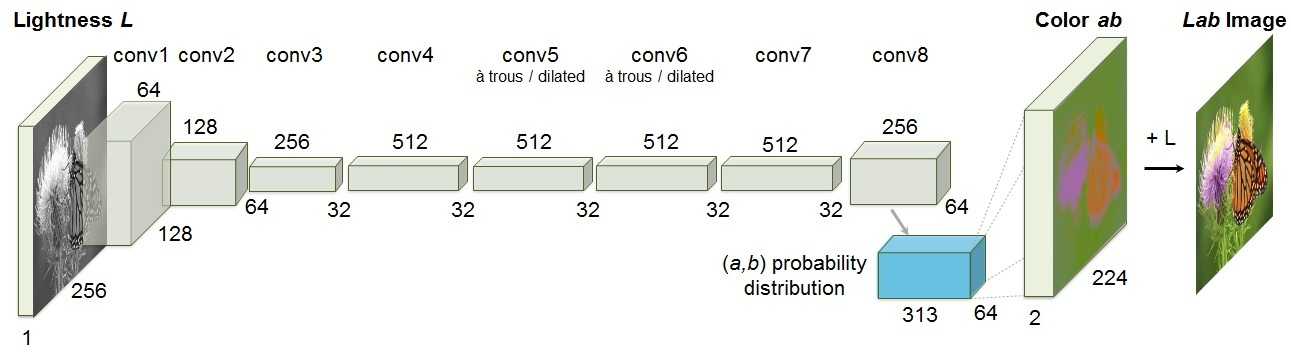

In [1]:
import os
import requests
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2024-04-23 08:35:57.067709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 08:35:58.240397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Models

In [2]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [3]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [4]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [5]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [6]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [7]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, dilation_rate=2, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [8]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(512, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.BatchNormalization()
])

In [9]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=1, padding="same", use_bias=True, activation="relu"),
    tf.keras.layers.Conv2D(313, kernel_size=13, strides=1, padding="same", use_bias=True),
    tf.keras.layers.BatchNormalization()
])

In [10]:
# TODO: normalize (in_l-self.l_cent)/self.l_norm

model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 1)),
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
    model7,
    model8,
    tf.keras.layers.Softmax(),
    tf.keras.layers.Conv2D(2, kernel_size=1, strides=1, padding="valid", use_bias=False, dilation_rate=1, activation="relu"),
    tf.keras.layers.UpSampling2D(4, interpolation="bilinear")
])

2024-04-23 08:36:00.666211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-23 08:36:00.825036: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-23 08:36:00.825105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-23 08:36:00.834852: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-23 08:36:00.834927: I external/local_xla/xla/stream_executor

In [11]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 64)   │        37,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 64, 64, 128)    │       221,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 32, 32, 256)    │     1,476,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 32, 32, 512)    │     5,901,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 32, 32, 512)    │     7,081,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 32, 32, 512)    │     7,081,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 32, 32, 512)    │     7,081,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 64, 64, 313)    │    16,820,765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 64, 64, 313)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 2)      │           626 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 256, 256, 2)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,703,759 (174.35 MB)

 Trainable params: 45,698,141 (174.32 MB)

 Non-trainable params: 5,618 (21.95 KB)

## Dataset

In [12]:
ds = tfds.load('imagenet_v2', shuffle_files=True)

In [13]:
def resize_with_crop(image):
    i = image['image']
    i = tf.cast(i, tf.float32)
    i = i/256
    i = tf.image.resize_with_crop_or_pad(i, 256, 256)
    i = tf.image.rgb_to_yuv(i)

    return (i[:,:,:1], i[:,:,1:])

In [14]:
ds = ds['test'].map(resize_with_crop)

## Train

In [15]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
)

In [16]:
EPOCHS = 1

history = model.fit(
    ds.batch(10),
    epochs=EPOCHS,
    # validation_data=val_df,
    # callbacks=[early_stopping],
)

I0000 00:00:1713854169.162785    8027 service.cc:145] XLA service 0x7f5fc4030860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713854169.166298    8027 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-23 08:36:09.430357: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-23 08:36:10.251174: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-04-23 08:36:23.544113: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng33{k2=2,k6=2,k13=1,k14=0,k22=0} for conv (f32[10,313,64,64]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,256,64,64]{3,2,1,0}, f32[313,256,13,13]{3,2,1,0}, f32[313]{0}), window={size=13x13 pad=6_6x6_6}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward"

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 754s 637ms/step - loss: 0.0060 - mean_absolute_error: 0.0510


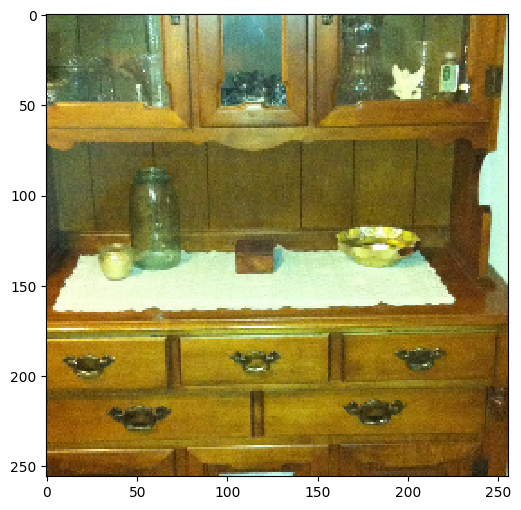

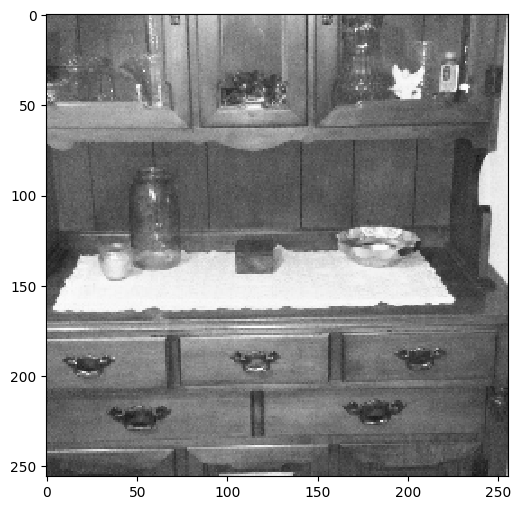

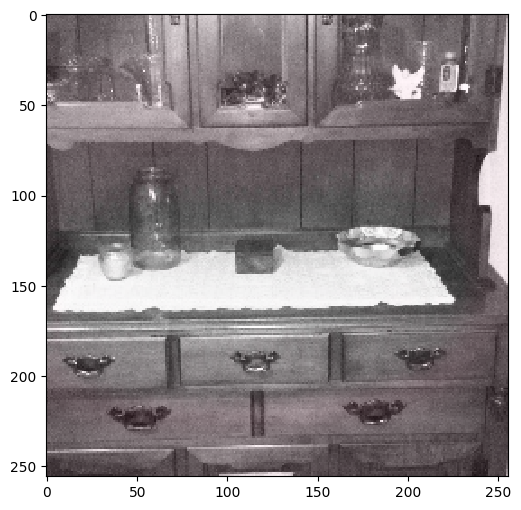

In [18]:
image = next(iter(ds))

input_image = tf.stack([image[0][:,:,0],image[1][:,:,0],image[1][:,:,1]],axis=-1)
input_image = tf.image.yuv_to_rgb(input_image)
plt.imshow(input_image, interpolation='nearest')
plt.show()

grey_image = image[0]
grey_image = tf.image.grayscale_to_rgb(grey_image)
plt.imshow(grey_image, interpolation='nearest')
plt.show()

out = model(tf.expand_dims(image[0],axis=0))
out = tf.stack([image[0][:,:,0],out[0,:,:,0],out[0,:,:,1]],axis=-1)
out = tf.image.yuv_to_rgb(out)
plt.imshow(out, interpolation='nearest')
plt.show()